### Adam Simpson Capstone Project - NLP Integration (Realistic Simulation)

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\adams\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Step 2: Load Dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.drop(['EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeCount'], axis=1, inplace=True)

In [3]:
# Step 3: Simulate Realistic Employee Comments (Not Linked to Attrition)
comments_positive = [
    "I feel supported by my manager.",
    "Work-life balance here is great.",
    "I enjoy collaborating with my team.",
    "The company invests in employee growth.",
    "Management is approachable and helpful."
]

In [4]:
comments_negative = [
    "Heavy workload makes it stressful.",
    "Communication from leadership is poor.",
    "Lack of promotion opportunities frustrates me.",
    "Expectations are unclear and often unrealistic.",
    "Frequent policy changes disrupt work."
]

In [5]:
# Random assignment of comments to avoid data leakage
df['Employee_Comments'] = np.random.choice(comments_positive + comments_negative, size=len(df))

In [6]:
# Step 4: Sentiment Analysis (VADER)
sid = SentimentIntensityAnalyzer()
df['Sentiment_Score'] = df['Employee_Comments'].apply(lambda x: sid.polarity_scores(x)['compound'])

### Data Preparation

In [7]:
# Step 5: Data Preparation
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

In [8]:
for col in df.select_dtypes(include='object').drop('Employee_Comments', axis=1).columns:
    df[col] = le.fit_transform(df[col])

### Feature Handling

In [9]:
# Define features and target
X = df.drop(['Attrition', 'Employee_Comments'], axis=1)
y = df['Attrition']

In [10]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# Step 6: Modeling (Logistic Regression Example)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Metrics and Model Comparison

In [13]:
# Step 7: Evaluation
y_pred = lr.predict(X_test)
y_probs = lr.predict_proba(X_test)[:, 1]

In [14]:
print(classification_report(y_test, y_pred))
print('ROC-AUC:', roc_auc_score(y_test, y_probs))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294

ROC-AUC: 0.806873977086743


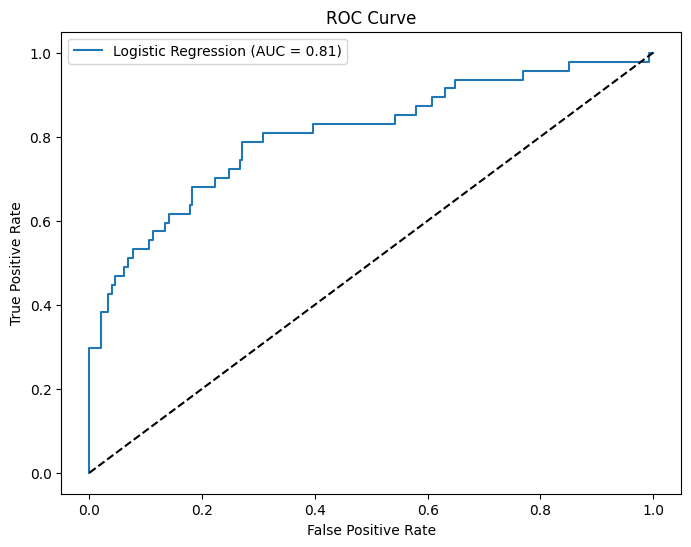

In [15]:
# Step 8: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_probs)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Model Comparison Expansion

In [16]:
# Step 9: Modeling Expanded

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_probs_lr = lr.predict_proba(X_test)[:, 1]

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_probs_rf = rf.predict_proba(X_test)[:, 1]

# XGBoost
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb.fit(X_train, y_train)
y_probs_xgb = xgb.predict_proba(X_test)[:, 1]

# --- Step 2: ROC-AUC Evaluation ---

print('Logistic Regression ROC-AUC:', roc_auc_score(y_test, y_probs_lr))
print('Random Forest ROC-AUC:', roc_auc_score(y_test, y_probs_rf))
print('XGBoost ROC-AUC:', roc_auc_score(y_test, y_probs_xgb))

Logistic Regression ROC-AUC: 0.806873977086743
Random Forest ROC-AUC: 0.7614350934619691
XGBoost ROC-AUC: 0.7693169092945128


C:\Users\adams\anaconda3\envs\IOD\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:58:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


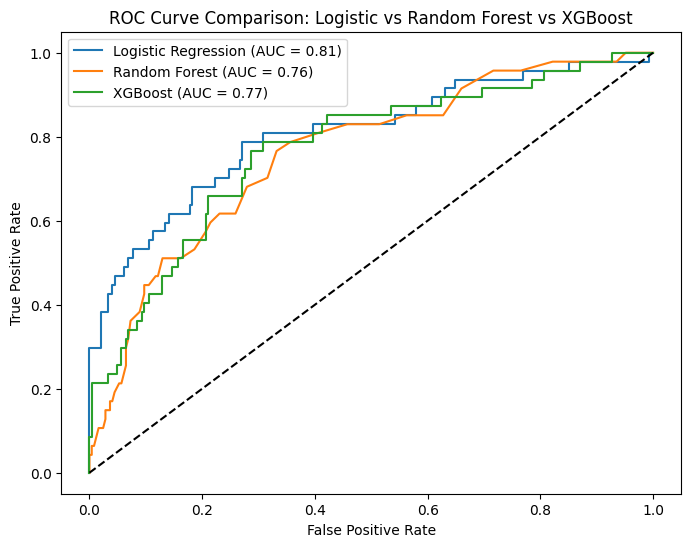

In [17]:
# Step 10: ROC Curve Comparison
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_probs_xgb)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_probs_lr)))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_probs_rf)))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, y_probs_xgb)))
plt.plot([0,1], [0,1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Logistic vs Random Forest vs XGBoost')
plt.legend()
plt.show()

### Sentiment Score Conclusion and Overall Distribution

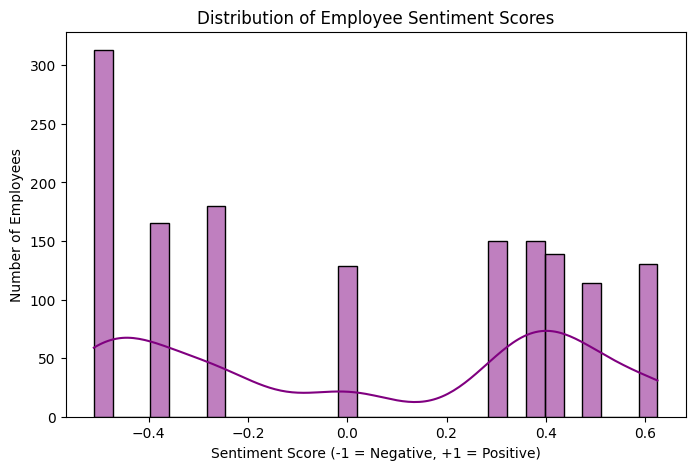

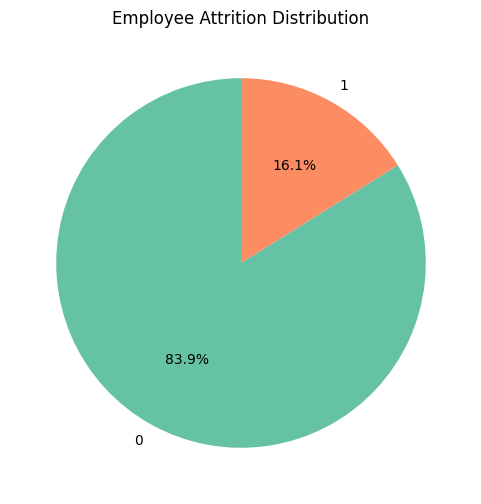

In [19]:
# Step 12: Sentiment Score Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Sentiment_Score'], bins=30, kde=True, color='purple')
plt.title('Distribution of Employee Sentiment Scores')
plt.xlabel('Sentiment Score (-1 = Negative, +1 = Positive)')
plt.ylabel('Number of Employees')
plt.show()

# Attrition Distribution Pie Chart
plt.figure(figsize=(6,6))
df['Attrition'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Employee Attrition Distribution')
plt.ylabel('')
plt.show()

#### With simulated employee comments assigned randomly, sentiment core now acts as an additional, realistic weak predictor. Sentiment scores mostly neutral/slightly negative.

#### Future Work:

    Real NLP data integration, using sentiment analysis for better attrition insights

    Focus on workload and compensation improvements.

    Deploy model to flag at-risk employees.

#### Sentiment analysis was integrated as an experimental feature. While simulated, it represents how real employee comments, survey responses, or HR tickets could provide valuable qualitative data for future attrition models.